# Agenda for live-coding demo

You can see this at https://github.com/reuven/cisco-iyl

1. Loading data into Pandas
2. Selective loading of data
3. Selecting rows
4. Selecting columns
5. Grouping
6. Visualizing
7. Dates and times

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('taxi.csv')

In [4]:
!head taxi.csv

In [5]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,-73.954430,40.764141,1,N,-73.974754,40.754093,2,17.0,0.0,0.5,0.00,0.0,0.3,17.80
1,2,2015-06-02 11:19:30,2015-06-02 11:27:56,1,0.46,-73.971443,40.758942,1,N,-73.978539,40.761909,1,6.5,0.0,0.5,1.00,0.0,0.3,8.30
2,2,2015-06-02 11:19:31,2015-06-02 11:30:30,1,0.87,-73.978111,40.738434,1,N,-73.990273,40.745438,1,8.0,0.0,0.5,2.20,0.0,0.3,11.00
3,2,2015-06-02 11:19:31,2015-06-02 11:39:02,1,2.13,-73.945892,40.773529,1,N,-73.971527,40.760330,1,13.5,0.0,0.5,2.86,0.0,0.3,17.16
4,1,2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,-73.979088,40.776772,1,N,-73.982162,40.758999,2,9.5,0.0,0.5,0.00,0.0,0.3,10.30


In [6]:
df = pd.read_csv('taxi.csv',
                 usecols=['passenger_count', 'trip_distance', 'total_amount'])

In [7]:
df.head()

,passenger_count,trip_distance,total_amount
0,1,1.63,17.80
1,1,0.46,8.30
2,1,0.87,11.00
3,1,2.13,17.16
4,1,1.40,10.30


In [8]:
df.shape

(9999, 3)

In [9]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_count  9999 non-null   int64  
 1   trip_distance    9999 non-null   float64
 2   total_amount     9999 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 234.5 KB


In [10]:
df.head(10)

,passenger_count,trip_distance,total_amount
0,1,1.63,17.80
1,1,0.46,8.30
2,1,0.87,11.00
3,1,2.13,17.16
4,1,1.40,10.30
5,1,1.40,10.55
6,1,1.80,16.30
7,4,11.90,73.84
8,1,1.27,15.80
9,1,0.60,6.30


In [12]:
# I can ask: What was the mean amount paid by people in their taxi rides:

df['total_amount'].mean()

17.552472247224728

In [13]:
df['total_amount'].max()

252.35

In [14]:
df['total_amount'].min()

-7.8

In [15]:
# descriptive statistics -- data that tells us about our data

df['total_amount'].describe()

count    9999.000000
mean       17.552472
std        15.137990
min        -7.800000
25%         8.800000
50%        12.800000
75%        19.800000
max       252.350000
Name: total_amount, dtype: float64

In [16]:
df['trip_distance'].describe()

count    9999.000000
mean        3.158511
std         4.037516
min         0.000000
25%         1.000000
50%         1.700000
75%         3.300000
max        64.600000
Name: trip_distance, dtype: float64

In [17]:
df.describe()

,passenger_count,trip_distance,total_amount
count,9999.000000,9999.000000,9999.000000
mean,1.659466,3.158511,17.552472
std,1.333306,4.037516,15.137990
min,0.000000,0.000000,-7.800000
25%,1.000000,1.000000,8.800000
50%,1.000000,1.700000,12.800000
75%,2.000000,3.300000,19.800000
max,6.000000,64.600000,252.350000


In [18]:
# how many trips in NYC taxis actually returned money to the rider?

df['total_amount'] < 0   # this produces a "boolean array"

0       False
1       False
2       False
3       False
4       False
        ...  
9994    False
9995    False
9996    False
9997    False
9998    False
Name: total_amount, Length: 9999, dtype: bool

In [19]:
(df['total_amount'] < 0).value_counts()

False    9996
True        3
Name: total_amount, dtype: int64

In [20]:
# find all of the rows in which we have a total amount < 0
df[df['total_amount'] < 0]   # boolean/mask index, finding only those rows in which the total_amount is < 0

,passenger_count,trip_distance,total_amount
2903,1,0.00,-3.3
5719,1,0.89,-7.8
9276,1,0.93,-7.3


In [21]:
# how many trips were taken with each number of passenger?

df['passenger_count'].value_counts() 

1    7207
2    1313
5     520
3     406
6     369
4     182
0       2
Name: passenger_count, dtype: int64

In [22]:
# how many trips were taken with each number of passenger (show as a percentage)

df['passenger_count'].value_counts(normalize=True)

1    0.720772
2    0.131313
5    0.052005
3    0.040604
6    0.036904
4    0.018202
0    0.000200
Name: passenger_count, dtype: float64

In [26]:
# what was the average fare paid with 1 passenger?

df.loc[df['passenger_count'] == 1, 'total_amount'].mean()

17.368569446371584

In [27]:
df.loc[df['passenger_count'] == 2, 'total_amount'].mean()

18.406306169078444

In [28]:
df.loc[df['passenger_count'] == 3, 'total_amount'].mean()

17.99470443349754

In [29]:
df.loc[df['passenger_count'] == 4, 'total_amount'].mean()

18.88164835164835

In [31]:
# grouping / group by 
# show me the average amount paid per value of passenger_count

df.groupby('passenger_count')['total_amount'].mean()

passenger_count
0    25.570000
1    17.368569
2    18.406306
3    17.994704
4    18.881648
5    17.211269
6    17.401355
Name: total_amount, dtype: float64

In [32]:
df.groupby('passenger_count')[['total_amount', 'trip_distance']].mean()

,total_amount,trip_distance
passenger_count,,
0,25.570000,4.600000
1,17.368569,3.092338
2,18.406306,3.384387
3,17.994704,3.342389
4,18.881648,3.628901
5,17.211269,3.182712
6,17.401355,3.170976


In [33]:
df.groupby('passenger_count')[['total_amount', 'trip_distance']].agg(['mean', 'std'])

total_amount            trip_distance          
                        mean        std          mean       std
passenger_count                                                
0                  25.570000  15.301791      4.600000  4.666905
1                  17.368569  15.286692      3.092338  4.020187
2                  18.406306  15.612365      3.384387  4.242826
3                  17.994704  13.717839      3.342389  3.822041
4                  18.881648  15.097867      3.628901  4.351369
5                  17.211269  14.031953      3.182712  3.969468
6                  17.401355  13.363827      3.170976  3.759807

<AxesSubplot:ylabel='Frequency'>

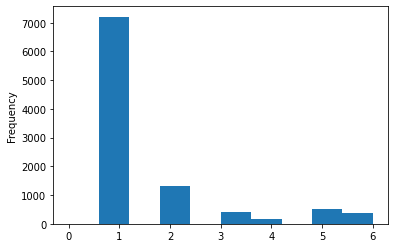

In [34]:
# let's get a histogram showing us the number of trips with each number of passengers

df['passenger_count'].plot.hist()

<AxesSubplot:>

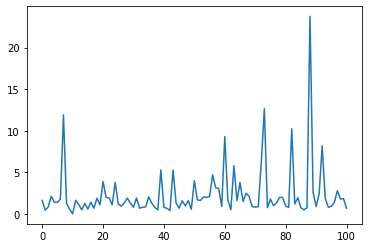

In [35]:
df.loc[:100, 'trip_distance'].plot.line()

<AxesSubplot:ylabel='passenger_count'>

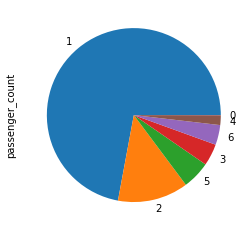

In [38]:
df['passenger_count'].value_counts().plot.pie()

<AxesSubplot:>

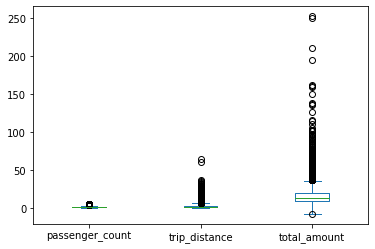

In [39]:
# box plots (box-and-whisker plots )

df.plot.box()

In [40]:
df.describe()

,passenger_count,trip_distance,total_amount
count,9999.000000,9999.000000,9999.000000
mean,1.659466,3.158511,17.552472
std,1.333306,4.037516,15.137990
min,0.000000,0.000000,-7.800000
25%,1.000000,1.000000,8.800000
50%,1.000000,1.700000,12.800000
75%,2.000000,3.300000,19.800000
max,6.000000,64.600000,252.350000


In [41]:
df = pd.read_csv('taxi.csv',
                 usecols=['tpep_pickup_datetime',
                          'tpep_dropoff_datetime',
                          'passenger_count', 'trip_distance', 'total_amount'],
                parse_dates=['tpep_pickup_datetime',
                            'tpep_dropoff_datetime'])

In [42]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,total_amount
0,2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,17.80
1,2015-06-02 11:19:30,2015-06-02 11:27:56,1,0.46,8.30
2,2015-06-02 11:19:31,2015-06-02 11:30:30,1,0.87,11.00
3,2015-06-02 11:19:31,2015-06-02 11:39:02,1,2.13,17.16
4,2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,10.30


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tpep_pickup_datetime   9999 non-null   datetime64[ns]
 1   tpep_dropoff_datetime  9999 non-null   datetime64[ns]
 2   passenger_count        9999 non-null   int64         
 3   trip_distance          9999 non-null   float64       
 4   total_amount           9999 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 390.7 KB


In [ ]:
df['tpep_dropof']